<a href="https://colab.research.google.com/github/utopickaiser/AI-Homework/blob/main/AI_Homework_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

750.0000000000001


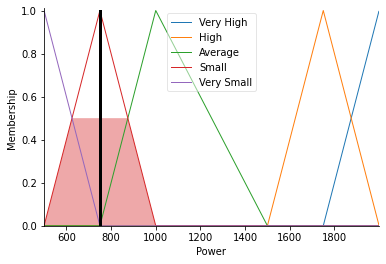

In [4]:
# bài toán nấu cơm
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,180,1),'Time')
rice = ctrl.Antecedent(np.arange(200,1000,1),'Rice')
power = ctrl.Consequent(np.arange(500,2000,1),'Power')
# Thiết lập cách giá trị
time['Very Fast'] = fuzz.trimf(time.universe,[10,10,20])
time['Fast'] = fuzz.trimf(time.universe,[10,20,50])
time['Average'] = fuzz.trimf(time.universe,[20,50,100])
time['Slow'] = fuzz.trimf(time.universe,[50,100,150])
time['Very Slow'] = fuzz.trimf(time.universe,[150,180,180])

rice['Very Much'] = fuzz.trimf(rice.universe,[800,1000,1000])
rice['Much'] = fuzz.trimf(rice.universe,[600,800,1000])
rice['Average'] = fuzz.trimf(rice.universe,[400,600,800])
rice['Less'] = fuzz.trimf(rice.universe,[200,400,600])
rice['Very Less'] = fuzz.trimf(rice.universe,[200,200,400])

power['Very High'] = fuzz.trimf(power.universe,[1750,2000,2000])
power['High'] = fuzz.trimf(power.universe,[1500,1750,2000])
power['Average'] = fuzz.trimf(power.universe,[750,1000,1500])
power['Small'] = fuzz.trimf(power.universe,[500,750,1000])
power['Very Small'] = fuzz.trimf(power.universe,[500,500,750])

#time.view()
#rice.view()
#power.view()
# Thiết lập các quy luật Membership
rule1 = ctrl.Rule(rice['Very Less'] & time['Very Slow'], power['Very Small'])
rule2 = ctrl.Rule(rice['Very Less'] & time['Slow'], power['Very Small'])
rule3 = ctrl.Rule(rice['Very Less'] & time['Average'], power['Small'])
rule4 = ctrl.Rule(rice['Very Less'] & time['Fast'], power['Average'])
rule5 = ctrl.Rule(rice['Very Less'] & time['Very Fast'], power['High'])

rule6 = ctrl.Rule(rice['Less'] & time['Very Slow'], power['Very Small'])
rule7 = ctrl.Rule(rice['Less'] & time['Slow'], power['Small'])
rule8 = ctrl.Rule(rice['Less'] & time['Average'], power['Small'])
rule9 = ctrl.Rule(rice['Less'] & time['Fast'], power['Average'])
rule10 = ctrl.Rule(rice['Less'] & time['Very Fast'], power['High'])

rule11 = ctrl.Rule(rice['Average'] & time['Very Slow'], power['Small'])
rule12 = ctrl.Rule(rice['Average'] & time['Slow'], power['Small'])
rule13 = ctrl.Rule(rice['Average'] & time['Average'], power['Average'])
rule14 = ctrl.Rule(rice['Average'] & time['Fast'], power['High'])
rule15 = ctrl.Rule(rice['Average'] & time['Very Fast'], power['High'])

rule16 = ctrl.Rule(rice['Much'] & time['Very Slow'], power['Average'])
rule17 = ctrl.Rule(rice['Much'] & time['Slow'], power['Average'])
rule18 = ctrl.Rule(rice['Much'] & time['Average'], power['High'])
rule19 = ctrl.Rule(rice['Much'] & time['Fast'], power['High'])
rule20 = ctrl.Rule(rice['Much'] & time['Very Fast'], power['Very High'])

rule21 = ctrl.Rule(rice['Very Much'] & time['Very Slow'], power['Average'])
rule22 = ctrl.Rule(rice['Very Much'] & time['Slow'], power['High'])
rule23 = ctrl.Rule(rice['Very Much'] & time['Average'], power['High'])
rule24 = ctrl.Rule(rice['Very Much'] & time['Fast'], power['Very High'])
rule25 = ctrl.Rule(rice['Very Much'] & time['Very Fast'], power['Very High'])

# Tạo giá trị để điều khiển các quy luật
CongSuat_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                    rule8,rule9,rule10,rule11,rule12,rule13,
                                    rule14,rule15,rule16,rule17,rule18,rule19,
                                    rule20,rule21,rule22,rule23,rule24,rule25])
CongSuat = ctrl.ControlSystemSimulation(CongSuat_ctrl)
# Nhập điều kiện đầu vào
CongSuat.input['Time'] = 100
CongSuat.input['Rice'] = 500
CongSuat.compute()
# Xuất kết quả
print(CongSuat.output['Power'])
power.view(sim = CongSuat)

0.4500000000000002


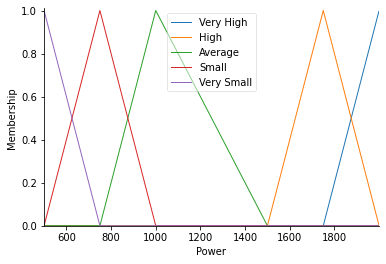

In [14]:
#Medical Diagnosis System Using Fuzzy Logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
fewer = ctrl.Antecedent(np.arange(0.1,1,0.01),'Fewer')
headache = ctrl.Antecedent(np.arange(0.1,1,0.01),'Headache')
nausea = ctrl.Antecedent(np.arange(0.1,1,0.01),'Nausea')
vomiting = ctrl.Antecedent(np.arange(0.1,1,0.01),'Vomiting')
jaundice = ctrl.Antecedent(np.arange(0.1,1,0.01),'Jaundice')
enlarge_liver = ctrl.Antecedent(np.arange(0.1,1,0.01),'Enlarge Liver')
joint_pain = ctrl.Antecedent(np.arange(0.1,1,0.01),'Joint Pain')
body_weakness = ctrl.Antecedent(np.arange(0.1,1,0.01),'Body Weakness')
dizziness = ctrl.Antecedent(np.arange(0.1,1,0.01),'Dizziness')
loss_of_appetite = ctrl.Antecedent(np.arange(0.1,1,0.01),'Loss of Appetite')
mp = ctrl.Antecedent(np.arange(0.1,1,0.01),'MP')
consclusion = ctrl.Consequent(np.arange(0.1,1,0.01),'Conclusion')


# Thiết lập cách giá trị
fewer['Mild'] = fuzz.trimf(fewer.universe,[0.1,0.2,0.3])
fewer['Moderate'] = fuzz.trimf(fewer.universe,[0.3,0.45,0.6])
fewer['Severe'] = fuzz.trimf(fewer.universe,[0.6,0.7,0.8])
fewer['Very Severe'] = fuzz.trimf(fewer.universe,[0.8,0.9,1])

headache['Mild'] = fuzz.trimf(headache.universe,[0.1,0.2,0.3])
headache['Moderate'] = fuzz.trimf(headache.universe,[0.3,0.45,0.6])
headache['Severe'] = fuzz.trimf(headache.universe,[0.6,0.7,0.8])
headache['Very Severe'] = fuzz.trimf(headache.universe,[0.8,0.9,1])

nausea['Mild'] = fuzz.trimf(nausea.universe,[0.1,0.2,0.3])
nausea['Moderate'] = fuzz.trimf(nausea.universe,[0.3,0.45,0.6])
nausea['Severe'] = fuzz.trimf(nausea.universe,[0.6,0.7,0.8])
nausea['Very Severe'] = fuzz.trimf(nausea.universe,[0.8,0.9,1])


vomiting['Mild'] = fuzz.trimf(vomiting.universe,[0.1,0.2,0.3])
vomiting['Moderate'] = fuzz.trimf(vomiting.universe,[0.3,0.45,0.6])
vomiting['Severe'] = fuzz.trimf(vomiting.universe,[0.6,0.7,0.8])
vomiting['Very Severe'] = fuzz.trimf(vomiting.universe,[0.8,0.9,1])


jaundice['Mild'] = fuzz.trimf(jaundice.universe,[0.1,0.2,0.3])
jaundice['Moderate'] = fuzz.trimf(jaundice.universe,[0.3,0.45,0.6])
jaundice['Severe'] = fuzz.trimf(jaundice.universe,[0.6,0.7,0.8])
jaundice['Very Severe'] = fuzz.trimf(jaundice.universe,[0.8,0.9,1])

enlarge_liver['Mild'] = fuzz.trimf(enlarge_liver.universe,[0.1,0.2,0.3])
enlarge_liver['Moderate'] = fuzz.trimf(enlarge_liver.universe,[0.3,0.45,0.6])
enlarge_liver['Severe'] = fuzz.trimf(enlarge_liver.universe,[0.6,0.7,0.8])
enlarge_liver['Very Severe'] = fuzz.trimf(enlarge_liver.universe,[0.8,0.9,1])

joint_pain['Mild'] = fuzz.trimf(joint_pain.universe,[0.1,0.2,0.3])
joint_pain['Moderate'] = fuzz.trimf(joint_pain.universe,[0.3,0.45,0.6])
joint_pain['Severe'] = fuzz.trimf(joint_pain.universe,[0.6,0.7,0.8])
joint_pain['Very Severe'] = fuzz.trimf(joint_pain.universe,[0.8,0.9,1])

body_weakness['Mild'] = fuzz.trimf(body_weakness.universe,[0.1,0.2,0.3])
body_weakness['Moderate'] = fuzz.trimf(body_weakness.universe,[0.3,0.45,0.6])
body_weakness['Severe'] = fuzz.trimf(body_weakness.universe,[0.6,0.7,0.8])
body_weakness['Very Severe'] = fuzz.trimf(body_weakness.universe,[0.8,0.9,1])

dizziness['Mild'] = fuzz.trimf(dizziness.universe,[0.1,0.2,0.3])
dizziness['Moderate'] = fuzz.trimf(dizziness.universe,[0.3,0.45,0.6])
dizziness['Severe'] = fuzz.trimf(dizziness.universe,[0.6,0.7,0.8])
dizziness['Very Severe'] = fuzz.trimf(dizziness.universe,[0.8,0.9,1])

loss_of_appetite['Mild'] = fuzz.trimf(loss_of_appetite.universe,[0.1,0.2,0.3])
loss_of_appetite['Moderate'] = fuzz.trimf(loss_of_appetite.universe,[0.3,0.45,0.6])
loss_of_appetite['Severe'] = fuzz.trimf(loss_of_appetite.universe,[0.6,0.7,0.8])
loss_of_appetite['Very Severe'] = fuzz.trimf(loss_of_appetite.universe,[0.8,0.9,1])

mp['Mild'] = fuzz.trimf(mp.universe,[0.1,0.2,0.3])
mp['Moderate'] = fuzz.trimf(mp.universe,[0.3,0.45,0.6])
mp['Severe'] = fuzz.trimf(mp.universe,[0.6,0.7,0.8])
mp['Very Severe'] = fuzz.trimf(mp.universe,[0.8,0.9,1])

consclusion['Mild'] = fuzz.trimf(consclusion.universe,[0.1,0.2,0.3])
consclusion['Moderate'] = fuzz.trimf(consclusion.universe,[0.3,0.45,0.6])
consclusion['Severe'] = fuzz.trimf(consclusion.universe,[0.6,0.7,0.8])
consclusion['Very Severe'] = fuzz.trimf(consclusion.universe,[0.8,0.9,1])

#time.view()
#rice.view()
#power.view()
# Thiết lập các quy luật Membership
rule1 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Mild'] 
                  & dizziness['Severe'] & loss_of_appetite['Mild'] 
                  & mp['Mild'], consclusion['Mild'])
rule2 = ctrl.Rule(fewer['Moderate'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule3 = ctrl.Rule(fewer['Severe'] & headache['Moderate'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Severe'])
rule4 = ctrl.Rule(fewer['Very Severe'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Mild'] & loss_of_appetite['Mild'] 
                  & mp['Severe'], consclusion['Very Severe'])
rule5 = ctrl.Rule(fewer['Moderate'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Moderate'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule6 = ctrl.Rule(fewer['Mild'] & headache['Moderate'] & nausea['Moderate']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Mild'] 
                  & dizziness['Moderate'] & loss_of_appetite['Mild'] 
                  & mp['Mild'], consclusion['Mild'])
rule7 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Severe'])
rule8 = ctrl.Rule(fewer['Moderate'] & headache['Moderate'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Moderate'] &
                  enlarge_liver['Moderate']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule9 = ctrl.Rule(fewer['Moderate'] & headache['Mild'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild'] &
                  enlarge_liver['Severe']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule10 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Moderate']
                  & joint_pain['Mild'] & body_weakness['Mild'] 
                  & dizziness['Mild'] & loss_of_appetite['Mild'] 
                  & mp['Mild'], consclusion['Mild'])
rule11 = ctrl.Rule(fewer['Severe'] & headache['Severe'] & nausea['Severe']
                  & vomiting['Severe'] & jaundice['Severe']
                   & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Very Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Very Severe'])
rule12 = ctrl.Rule(fewer['Moderate'] & headache['Severe'] & nausea['Moderate']
                  & vomiting['Severe'] & jaundice['Moderate']
                   & enlarge_liver['Severe']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Mild'] 
                  & mp['Moderate'], consclusion['Severe'])
rule13 = ctrl.Rule(fewer['Mild'] & headache['Moderate'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Moderate'] 
                  & dizziness['Mild'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule14 = ctrl.Rule(fewer['Severe'] & headache['Severe'] & nausea['Moderate']
                  & vomiting['Severe'] & jaundice['Severe']
                   & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Severe'], consclusion['Severe'])
rule14 = ctrl.Rule(fewer['Severe'] & headache['Severe'] & nausea['Moderate']
                  & vomiting['Severe'] & jaundice['Severe']
                   & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Severe'], consclusion['Severe'])
rule15 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Severe'] 
                  & dizziness['Mild'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Severe'])
rule16 = ctrl.Rule(fewer['Very Severe'] & headache['Moderate'] & nausea['Mild']
                  & vomiting['Moderate'] & jaundice['Severe']
                   & enlarge_liver['Moderate']
                  & joint_pain['Mild'] & body_weakness['Very Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Mild'] 
                  & mp['Moderate'], consclusion['Very Severe'])
rule17 = ctrl.Rule(fewer['Mild'] & headache['Very Severe'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Moderate']
                  & joint_pain['Mild'] & body_weakness['Moderate'] 
                  & dizziness['Very Severe'] & loss_of_appetite['Mild'] 
                  & mp['Moderate'], consclusion['Very Severe'])
rule18 = ctrl.Rule(fewer['Moderate'] & headache['Very Severe'] 
                   & nausea['Very Severe'] & vomiting['Mild'] 
                   & jaundice['Severe'] & enlarge_liver['Severe']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Very Severe'] & loss_of_appetite['Very Severe'] 
                  & mp['Severe'], consclusion['Very Severe'])
rule19 = ctrl.Rule(fewer['Moderate'] & headache['Moderate'] 
                   & nausea['Moderate'] & vomiting['Moderate'] 
                   & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule20 = ctrl.Rule(fewer['Very Severe'] & headache['Severe'] 
                   & nausea['Severe'] & vomiting['Severe'] 
                   & jaundice['Severe'] & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Very Severe'])
# Tạo giá trị để điều khiển các quy luật
Medicine_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                    rule8,rule9,rule10,rule11,rule12,rule13,
                                    rule14,rule15,rule16,rule17,rule18,rule19,
                                    rule20])
Medicine = ctrl.ControlSystemSimulation(Medicine_ctrl)
# Nhập điều kiện đầu vào
Medicine.input['Fewer'] = 0.5
Medicine.input['Headache'] = 0.5
Medicine.input['Nausea'] = 0.5
Medicine.input['Vomiting'] = 0.5
Medicine.input['Jaundice'] = 0.5
Medicine.input['Enlarge Liver'] = 0.5
Medicine.input['Joint Pain'] = 0.5
Medicine.input['Body Weakness'] = 0.5
Medicine.input['Dizziness'] = 0.5
Medicine.input['Loss of Appetite'] = 0.5
Medicine.input['MP'] = 0.5

Medicine.compute()
# Xuất kết quả
print(Medicine.output['Conclusion'])
power.view(sim = Medicine)

0.4500000000000002


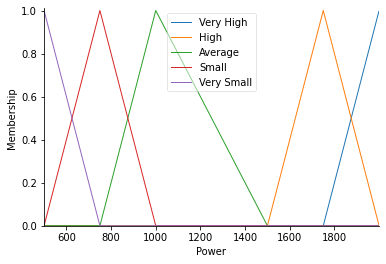

In [15]:
#Medical Diagnosis System Using Fuzzy Logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
fewer = ctrl.Antecedent(np.arange(0.1,1,0.01),'Fewer')
headache = ctrl.Antecedent(np.arange(0.1,1,0.01),'Headache')
nausea = ctrl.Antecedent(np.arange(0.1,1,0.01),'Nausea')
vomiting = ctrl.Antecedent(np.arange(0.1,1,0.01),'Vomiting')
jaundice = ctrl.Antecedent(np.arange(0.1,1,0.01),'Jaundice')
enlarge_liver = ctrl.Antecedent(np.arange(0.1,1,0.01),'Enlarge Liver')
joint_pain = ctrl.Antecedent(np.arange(0.1,1,0.01),'Joint Pain')
body_weakness = ctrl.Antecedent(np.arange(0.1,1,0.01),'Body Weakness')
dizziness = ctrl.Antecedent(np.arange(0.1,1,0.01),'Dizziness')
loss_of_appetite = ctrl.Antecedent(np.arange(0.1,1,0.01),'Loss of Appetite')
mp = ctrl.Antecedent(np.arange(0.1,1,0.01),'MP')
consclusion = ctrl.Consequent(np.arange(0.1,1,0.01),'Conclusion')


# Thiết lập cách giá trị
fewer['Mild'] = fuzz.trimf(fewer.universe,[0.1,0.2,0.3])
fewer['Moderate'] = fuzz.trimf(fewer.universe,[0.3,0.45,0.6])
fewer['Severe'] = fuzz.trimf(fewer.universe,[0.6,0.7,0.8])
fewer['Very Severe'] = fuzz.trimf(fewer.universe,[0.8,0.9,1])

headache['Mild'] = fuzz.trimf(headache.universe,[0.1,0.2,0.3])
headache['Moderate'] = fuzz.trimf(headache.universe,[0.3,0.45,0.6])
headache['Severe'] = fuzz.trimf(headache.universe,[0.6,0.7,0.8])
headache['Very Severe'] = fuzz.trimf(headache.universe,[0.8,0.9,1])

nausea['Mild'] = fuzz.trimf(nausea.universe,[0.1,0.2,0.3])
nausea['Moderate'] = fuzz.trimf(nausea.universe,[0.3,0.45,0.6])
nausea['Severe'] = fuzz.trimf(nausea.universe,[0.6,0.7,0.8])
nausea['Very Severe'] = fuzz.trimf(nausea.universe,[0.8,0.9,1])


vomiting['Mild'] = fuzz.trimf(vomiting.universe,[0.1,0.2,0.3])
vomiting['Moderate'] = fuzz.trimf(vomiting.universe,[0.3,0.45,0.6])
vomiting['Severe'] = fuzz.trimf(vomiting.universe,[0.6,0.7,0.8])
vomiting['Very Severe'] = fuzz.trimf(vomiting.universe,[0.8,0.9,1])


jaundice['Mild'] = fuzz.trimf(jaundice.universe,[0.1,0.2,0.3])
jaundice['Moderate'] = fuzz.trimf(jaundice.universe,[0.3,0.45,0.6])
jaundice['Severe'] = fuzz.trimf(jaundice.universe,[0.6,0.7,0.8])
jaundice['Very Severe'] = fuzz.trimf(jaundice.universe,[0.8,0.9,1])

enlarge_liver['Mild'] = fuzz.trimf(enlarge_liver.universe,[0.1,0.2,0.3])
enlarge_liver['Moderate'] = fuzz.trimf(enlarge_liver.universe,[0.3,0.45,0.6])
enlarge_liver['Severe'] = fuzz.trimf(enlarge_liver.universe,[0.6,0.7,0.8])
enlarge_liver['Very Severe'] = fuzz.trimf(enlarge_liver.universe,[0.8,0.9,1])

joint_pain['Mild'] = fuzz.trimf(joint_pain.universe,[0.1,0.2,0.3])
joint_pain['Moderate'] = fuzz.trimf(joint_pain.universe,[0.3,0.45,0.6])
joint_pain['Severe'] = fuzz.trimf(joint_pain.universe,[0.6,0.7,0.8])
joint_pain['Very Severe'] = fuzz.trimf(joint_pain.universe,[0.8,0.9,1])

body_weakness['Mild'] = fuzz.trimf(body_weakness.universe,[0.1,0.2,0.3])
body_weakness['Moderate'] = fuzz.trimf(body_weakness.universe,[0.3,0.45,0.6])
body_weakness['Severe'] = fuzz.trimf(body_weakness.universe,[0.6,0.7,0.8])
body_weakness['Very Severe'] = fuzz.trimf(body_weakness.universe,[0.8,0.9,1])

dizziness['Mild'] = fuzz.trimf(dizziness.universe,[0.1,0.2,0.3])
dizziness['Moderate'] = fuzz.trimf(dizziness.universe,[0.3,0.45,0.6])
dizziness['Severe'] = fuzz.trimf(dizziness.universe,[0.6,0.7,0.8])
dizziness['Very Severe'] = fuzz.trimf(dizziness.universe,[0.8,0.9,1])

loss_of_appetite['Mild'] = fuzz.trimf(loss_of_appetite.universe,[0.1,0.2,0.3])
loss_of_appetite['Moderate'] = fuzz.trimf(loss_of_appetite.universe,[0.3,0.45,0.6])
loss_of_appetite['Severe'] = fuzz.trimf(loss_of_appetite.universe,[0.6,0.7,0.8])
loss_of_appetite['Very Severe'] = fuzz.trimf(loss_of_appetite.universe,[0.8,0.9,1])

mp['Mild'] = fuzz.trimf(mp.universe,[0.1,0.2,0.3])
mp['Moderate'] = fuzz.trimf(mp.universe,[0.3,0.45,0.6])
mp['Severe'] = fuzz.trimf(mp.universe,[0.6,0.7,0.8])
mp['Very Severe'] = fuzz.trimf(mp.universe,[0.8,0.9,1])

consclusion['Mild'] = fuzz.trimf(consclusion.universe,[0.1,0.2,0.3])
consclusion['Moderate'] = fuzz.trimf(consclusion.universe,[0.3,0.45,0.6])
consclusion['Severe'] = fuzz.trimf(consclusion.universe,[0.6,0.7,0.8])
consclusion['Very Severe'] = fuzz.trimf(consclusion.universe,[0.8,0.9,1])

#time.view()
#rice.view()
#power.view()
# Thiết lập các quy luật Membership
rule1 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Mild'] 
                  & dizziness['Severe'] & loss_of_appetite['Mild'] 
                  & mp['Mild'], consclusion['Mild'])
rule2 = ctrl.Rule(fewer['Moderate'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule3 = ctrl.Rule(fewer['Severe'] & headache['Moderate'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Severe'])
rule4 = ctrl.Rule(fewer['Very Severe'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Mild'] & loss_of_appetite['Mild'] 
                  & mp['Severe'], consclusion['Very Severe'])
rule5 = ctrl.Rule(fewer['Moderate'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Moderate'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule6 = ctrl.Rule(fewer['Mild'] & headache['Moderate'] & nausea['Moderate']
                  & vomiting['Mild'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Mild'] 
                  & dizziness['Moderate'] & loss_of_appetite['Mild'] 
                  & mp['Mild'], consclusion['Mild'])
rule7 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Severe'])
rule8 = ctrl.Rule(fewer['Moderate'] & headache['Moderate'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Moderate'] &
                  enlarge_liver['Moderate']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule9 = ctrl.Rule(fewer['Moderate'] & headache['Mild'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild'] &
                  enlarge_liver['Severe']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule10 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Moderate']
                  & joint_pain['Mild'] & body_weakness['Mild'] 
                  & dizziness['Mild'] & loss_of_appetite['Mild'] 
                  & mp['Mild'], consclusion['Mild'])
rule11 = ctrl.Rule(fewer['Severe'] & headache['Severe'] & nausea['Severe']
                  & vomiting['Severe'] & jaundice['Severe']
                   & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Very Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Very Severe'])
rule12 = ctrl.Rule(fewer['Moderate'] & headache['Severe'] & nausea['Moderate']
                  & vomiting['Severe'] & jaundice['Moderate']
                   & enlarge_liver['Severe']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Mild'] 
                  & mp['Moderate'], consclusion['Severe'])
rule13 = ctrl.Rule(fewer['Mild'] & headache['Moderate'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Moderate'] 
                  & dizziness['Mild'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule14 = ctrl.Rule(fewer['Severe'] & headache['Severe'] & nausea['Moderate']
                  & vomiting['Severe'] & jaundice['Severe']
                   & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Severe'], consclusion['Severe'])
rule14 = ctrl.Rule(fewer['Severe'] & headache['Severe'] & nausea['Moderate']
                  & vomiting['Severe'] & jaundice['Severe']
                   & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Severe'], consclusion['Severe'])
rule15 = ctrl.Rule(fewer['Mild'] & headache['Mild'] & nausea['Mild']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Mild']
                  & joint_pain['Mild'] & body_weakness['Severe'] 
                  & dizziness['Mild'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Severe'])
rule16 = ctrl.Rule(fewer['Very Severe'] & headache['Moderate'] & nausea['Mild']
                  & vomiting['Moderate'] & jaundice['Severe']
                   & enlarge_liver['Moderate']
                  & joint_pain['Mild'] & body_weakness['Very Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Mild'] 
                  & mp['Moderate'], consclusion['Very Severe'])
rule17 = ctrl.Rule(fewer['Mild'] & headache['Very Severe'] & nausea['Moderate']
                  & vomiting['Moderate'] & jaundice['Mild']
                   & enlarge_liver['Moderate']
                  & joint_pain['Mild'] & body_weakness['Moderate'] 
                  & dizziness['Very Severe'] & loss_of_appetite['Mild'] 
                  & mp['Moderate'], consclusion['Very Severe'])
rule18 = ctrl.Rule(fewer['Moderate'] & headache['Very Severe'] 
                   & nausea['Very Severe'] & vomiting['Mild'] 
                   & jaundice['Severe'] & enlarge_liver['Severe']
                  & joint_pain['Moderate'] & body_weakness['Severe'] 
                  & dizziness['Very Severe'] & loss_of_appetite['Very Severe'] 
                  & mp['Severe'], consclusion['Very Severe'])
rule19 = ctrl.Rule(fewer['Moderate'] & headache['Moderate'] 
                   & nausea['Moderate'] & vomiting['Moderate'] 
                   & jaundice['Mild'] & enlarge_liver['Mild']
                  & joint_pain['Moderate'] & body_weakness['Moderate'] 
                  & dizziness['Moderate'] & loss_of_appetite['Moderate'] 
                  & mp['Moderate'], consclusion['Moderate'])
rule20 = ctrl.Rule(fewer['Very Severe'] & headache['Severe'] 
                   & nausea['Severe'] & vomiting['Severe'] 
                   & jaundice['Severe'] & enlarge_liver['Severe']
                  & joint_pain['Severe'] & body_weakness['Severe'] 
                  & dizziness['Severe'] & loss_of_appetite['Severe'] 
                  & mp['Moderate'], consclusion['Very Severe'])
# Tạo giá trị để điều khiển các quy luật
Medicine_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                    rule8,rule9,rule10,rule11,rule12,rule13,
                                    rule14,rule15,rule16,rule17,rule18,rule19,
                                    rule20])
Medicine = ctrl.ControlSystemSimulation(Medicine_ctrl)
# Nhập điều kiện đầu vào
Medicine.input['Fewer'] = 0.5
Medicine.input['Headache'] = 0.5
Medicine.input['Nausea'] = 0.5
Medicine.input['Vomiting'] = 0.5
Medicine.input['Jaundice'] = 0.5
Medicine.input['Enlarge Liver'] = 0.5
Medicine.input['Joint Pain'] = 0.5
Medicine.input['Body Weakness'] = 0.5
Medicine.input['Dizziness'] = 0.5
Medicine.input['Loss of Appetite'] = 0.5
Medicine.input['MP'] = 0.5

Medicine.compute()
# Xuất kết quả
print(Medicine.output['Conclusion'])
power.view(sim = Medicine)